# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama: Masdarul Rizqi** 
- **Email: m.rizqi1221@gmail.com** 
- **ID Dicoding: masdarulrizqi** 

## **Menentukan Pertanyaan Bisnis**

- Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
- Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?
- Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?
- Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda (baik Casual ataupun Registered)?
- Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import zipfile

#### **Ektrak zip**

In [2]:
local_zip = './Data/Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./Data')
zip_ref.close()

## **Data Wrangling**

### **Gathering Data**

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih ``Bike Sharing Dataset``, maka saya mengimpor file ``day.csv`` dan ``hour.csv``

#### **Load Tabel**

In [3]:
day_df, hour_df = './Data/day.csv','./Data/hour.csv'
day_df = pd.read_csv(day_df)
hour_df = pd.read_csv(hour_df)

In [4]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [5]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### **Assessing Data**

#### **Menilai Data  `day_df`**
1.Mengecek Tipe data `day_df`

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada mising values

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita lihat diatas bahwa tabel `day_df` tidak ada mising value.

3.Mengecek apakah data duplikat data

In [8]:
print(f"Jumlah duplikasi data: {day_df.duplicated().sum()}")

Jumlah duplikasi data: 0


Pada tabel `day_df` terdapat 0 data yang duplikat, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita liat diatas, tidak ada keanehan pada nilai statistiknya.

#### **Menilai Data `hour_df`**
1. 1.Mengecek Tipe data `hour_df`

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada mising values

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita lihat diatas bahwa tabel `hour_df` tidak ada mising value.

3.Mengecek apakah data duplikat data

In [12]:
print(f"Jumlah duplikasi data: {hour_df.duplicated().sum()}")

Jumlah duplikasi data: 0


Pada tabel `hour_df` terdapat 0 data yang duplikat, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita liat diatas, tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

1. Menghapus beberapa kolom yang tidak akan digunakan dan tidak pakai data ``hour_df``

Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita sekarang akan tidak pakai  tabel `hour_df`. Alasannya adalah karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel `hour_df` dan `day_df` itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [14]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
    if i in drop_col:
        day_df.drop(labels=i, axis=1, inplace=True)
        hour_df.drop(labels=i, axis=1, inplace=True)

day_df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349


2. Mengubah beberapa detail tentang kolom

Karena nama-nama dari kolom diatas agak kurang sesuai dengan style saya, maka akan saya rubah. Dan juga saya lebih suka dengan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah. Serta sebelumnya ada tipe data yang juga tidak sesuai, dan itu akan saya rubah juga.

In [15]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'Dateday',
    'yr': 'Year',
    'mnth': 'Month',
    'weathersit': 'Weather_Cond',
    'cnt': 'Count'
},inplace=True)

day_df.head(3)

,Dateday,season,Year,Month,holiday,weekday,workingday,Weather_Cond,temp,atemp,hum,casual,registered,Count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349


In [16]:
# Mengubah angka menjadi keterangan
day_df['Month'] = day_df['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['Weather_Cond'] = day_df['Weather_Cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
# Mengubah tipe data ke datetime
day_df['Dateday'] = pd.to_datetime(day_df.Dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['Year'] = day_df.Year.astype('category')
day_df['Month'] = day_df.Month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['Weather_Cond'] = day_df.Weather_Cond.astype('category')

day_df.head(3)

,Dateday,season,Year,Month,holiday,weekday,workingday,Weather_Cond,temp,atemp,hum,casual,registered,Count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   Year          731 non-null    category      
 3   Month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   Weather_Cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  Count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

In [18]:
print(day_df.columns)

Index(['Dateday', 'season', 'Year', 'Month', 'holiday', 'weekday',
       'workingday', 'Weather_Cond', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'Count'],
      dtype='object')


In [19]:
print(hour_df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'cnt'],
      dtype='object')


### **Explore Data ``day_df``**
1.Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [20]:
day_df.groupby(by='Month').agg({
    'Count': ['max', 'min', 'mean', 'sum']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\1105520713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Month').agg({


Count                           
        max   min         mean     sum
Month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan Rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

2. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [21]:
day_df.groupby(by='Weather_Cond').agg({
    'Count': ['max', 'min', 'mean', 'sum']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\3025860858.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Weather_Cond').agg({


Count                           
                      max  min         mean      sum
Weather_Cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas,  bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

3. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [22]:
day_df.groupby(by='holiday').agg({
    'Count': ['max', 'min', 'mean', 'sum']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\727898088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


Count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas,  bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

4. Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [23]:
day_df.groupby(by='weekday').agg({
    'Count':['max','min','mean']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\2142746302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


Count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [24]:
day_df.groupby(by='workingday').agg({
    'Count': ['max', 'min', 'mean']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\739112780.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


Count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar jatuh kepada workingday dibandingkan dengan hari non-workingday. Namun dapat kita lihat juga, hasilnya lumayan berbeda walaupun tidak banyak.

6. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [25]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'Count': ['max', 'min', 'mean']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\2235310179.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered Count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

7. Kelompokkan temp, hum, dan humidity berdasarkan season

In [26]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\3725487608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:
- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
- Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

8. Correlation Matrix 

Text(0.5, 1.0, 'Correlation Heatmap')

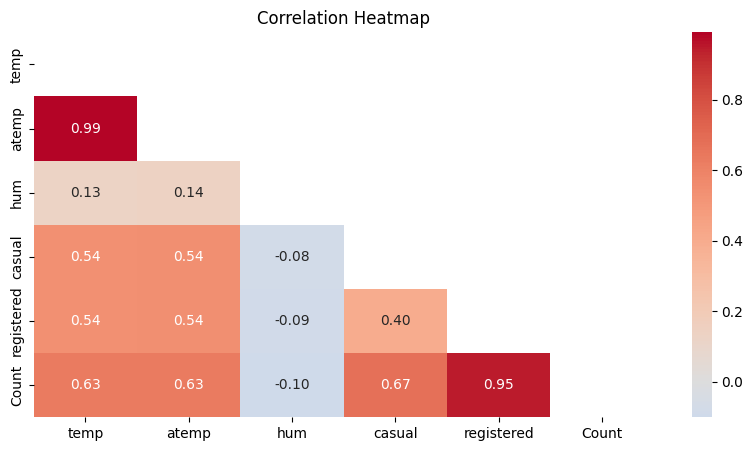

In [27]:
fig, axe = plt.subplots(figsize=(10,5))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

9. Scatter Plot

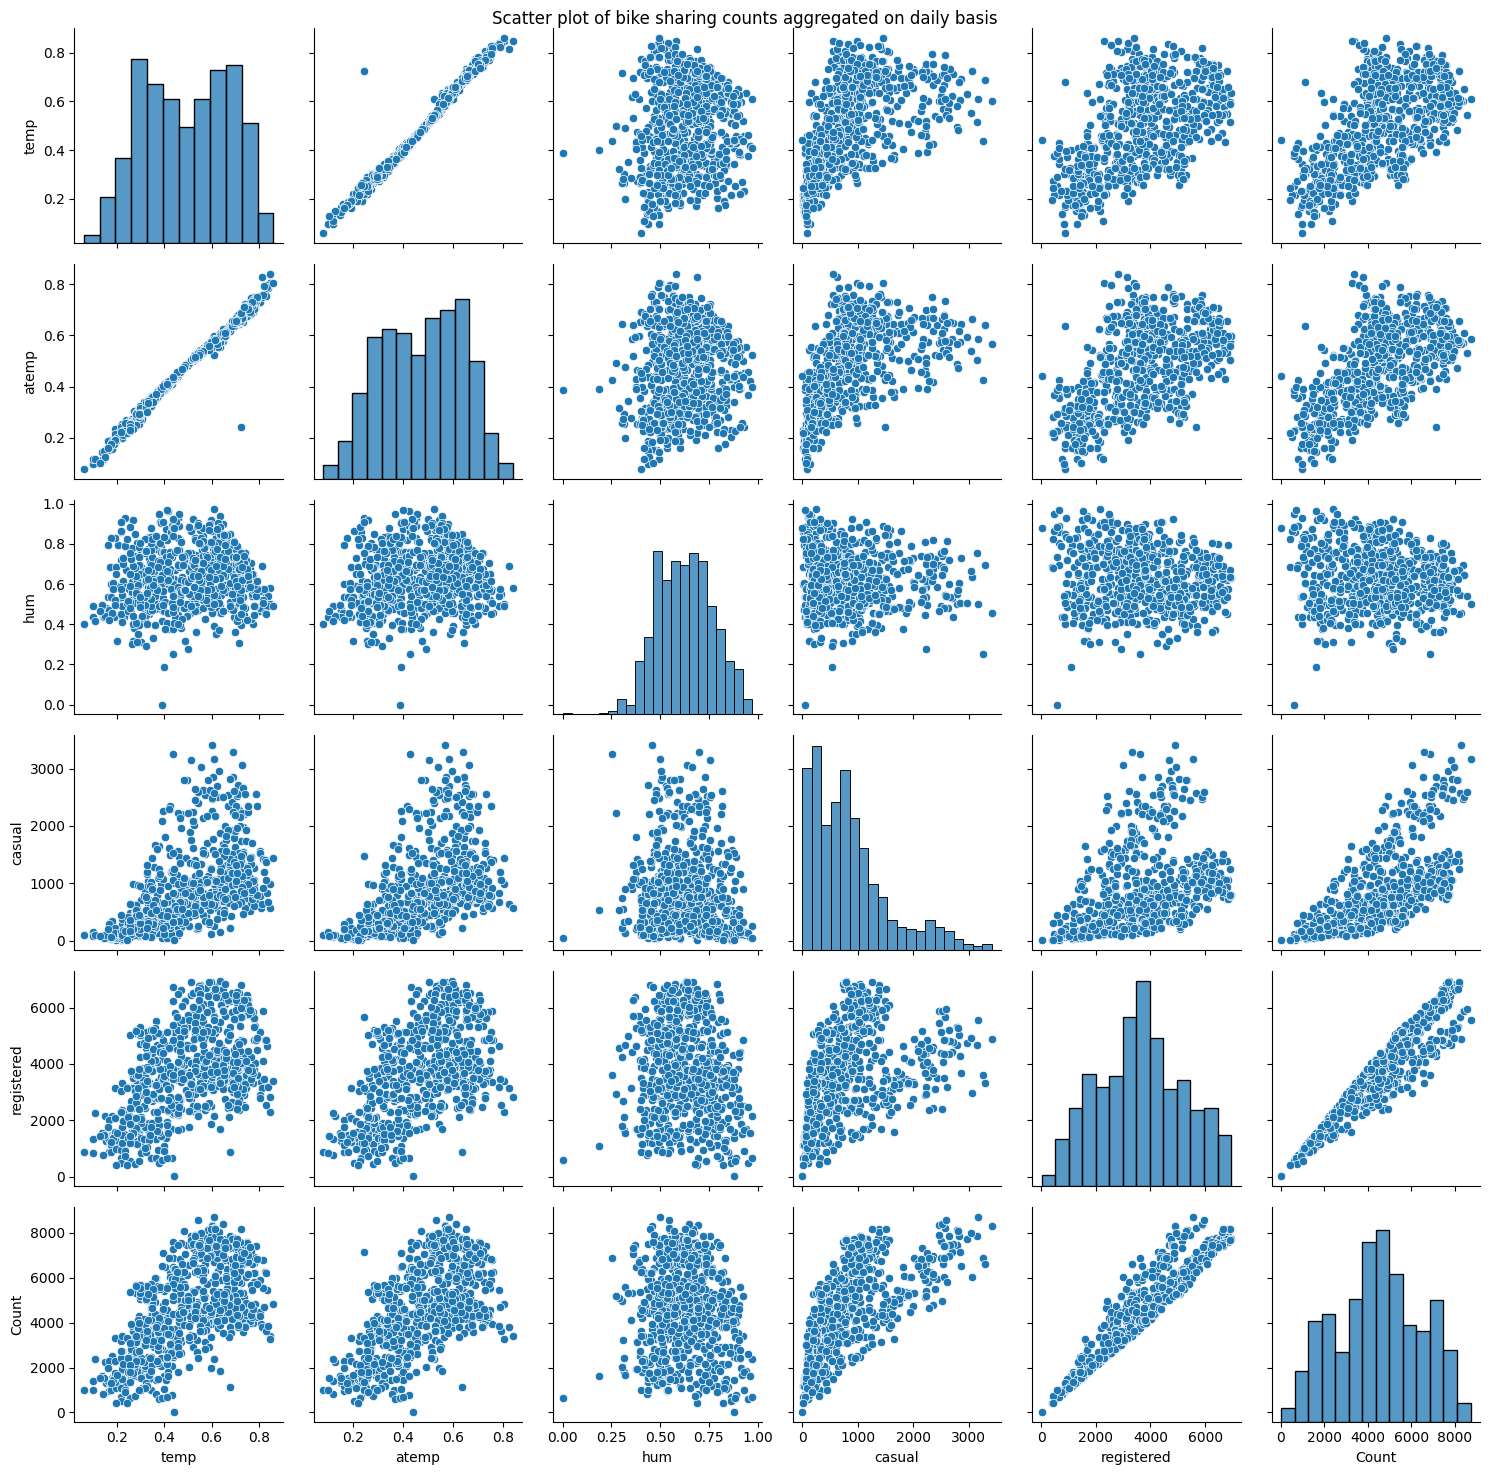

In [28]:
g = sns.pairplot(day_df)
g.fig.suptitle("Scatter plot of bike sharing counts aggregated on daily basis")
plt.tight_layout()

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Apakah ada peran cuaca terhadap jumlah pengguna sepeda?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\1980923728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['Weather_Cond'], y=day_df['Count'], palette=colors)


Text(0, 0.5, 'Jumlah Pengguna Sepeda')

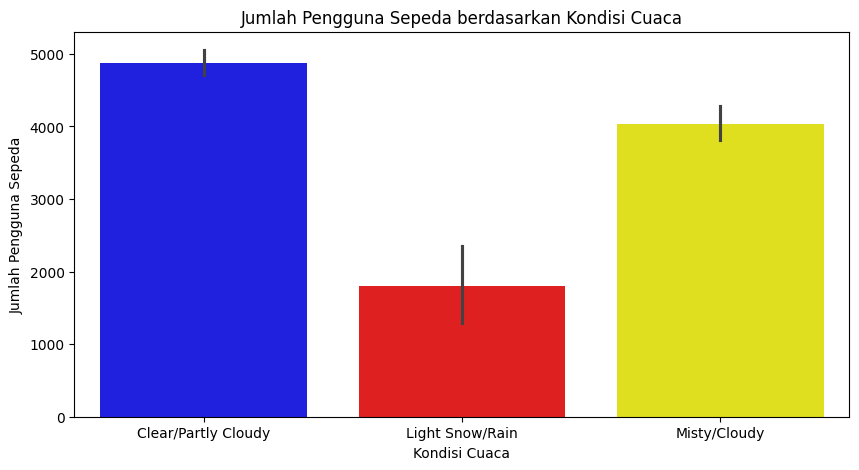

In [29]:
plt.figure(figsize=(10, 5))

# Membuat Warna 
colors = ['blue', 'red', 'yellow']


sns.barplot(x=day_df['Weather_Cond'], y=day_df['Count'], palette=colors)
plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')

Berdasarkan Visualisasi data menggunakan boxplot, bahwa jelas terdapat terdapat hubungan antara kondisi cuaca dan penyewa sepeda,kondisi cuaca saat ``Clear/Party Cloudy(Berwarna Biru)`` yang banyak diminati, kemudian untuk kondisi ``Light Snow/Rain(Berwarna Merah)`` yang paling sedikit diminati, dan Terakhir ketika cuaca ``Mist/Cloudy (Berwarna Kuning)`` yang minat sedang.

### **Pertanyaan 2: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\1012259486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['workingday'], y=day_df['Count'], palette=Color, ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\1012259486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['holiday'], y=day_df['Count'], palette=Color, ax=axes[1])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\1012259486.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['weekday'], y=day_df['Count'], palette=colors, ax=axes[2])


Text(0, 0.5, 'Jumlah Pengguna Sepeda')

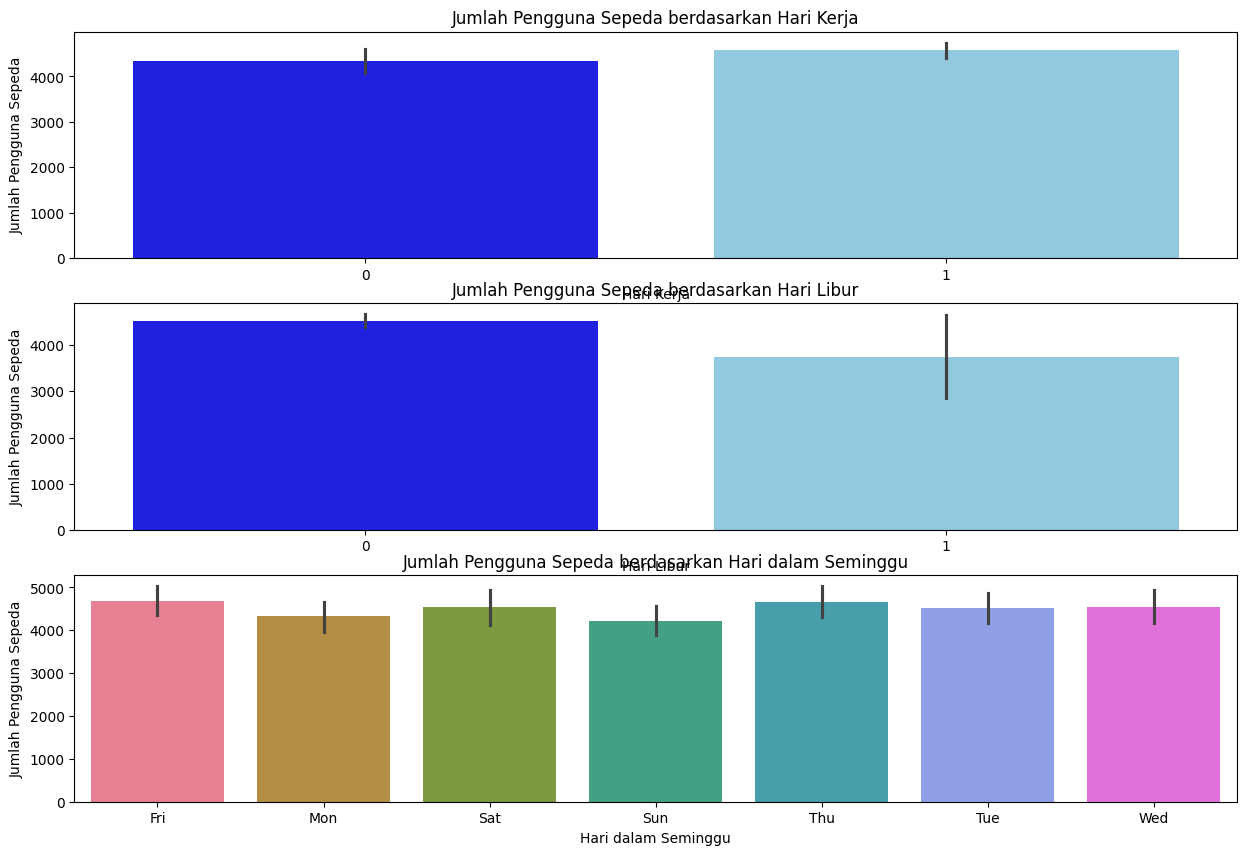

In [30]:
fig, axes = plt.subplots(nrows=3, figsize=(15, 10))
colors = sns.color_palette("husl", n_colors=7)
Color = ['blue', 'skyblue']

# Berdasarkan Workingday
sns.barplot(x=day_df['workingday'], y=day_df['Count'], palette=Color, ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan Holiday
sns.barplot(x=day_df['holiday'], y=day_df['Count'], palette=Color, ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan Weekday
sns.barplot(x=day_df['weekday'], y=day_df['Count'], palette=colors, ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

Berdasarkan Visualisasi diatas menggunakan barplot, di dapat peryataan sebagai berikut:

- Jumlah penyewa sepeda lebih banyak pada hari kerja daripada akhir pekan. warna biru menandakan akhir pekan dan warna langit biru menandakan hari kerja.
- Jumlah penyewa sepedah jauh lebih banya hari biasa (warna biru) dibandingkan hari libur (warna biru langit)
- Jumlah penyewa sepeda pada hari Friday yang menempati posisi pertama.

### **Pertanyaan 3: Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\557672166.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["Month", "Year"]).agg({


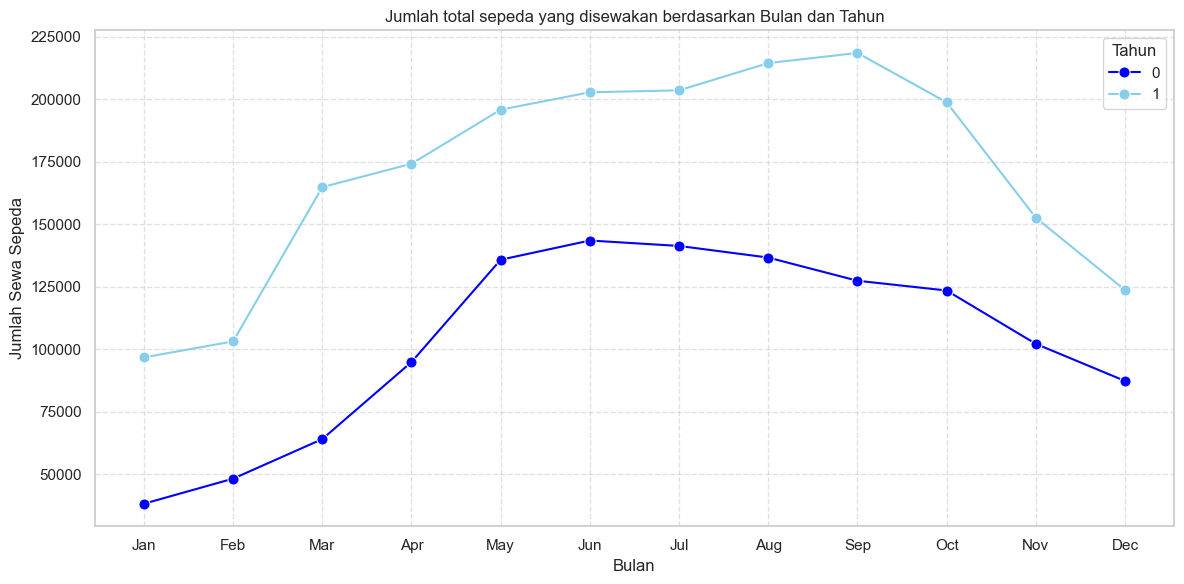

In [31]:
day_df['Month'] = pd.Categorical(day_df['Month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["Month", "Year"]).agg({
    "Count": "sum"
}).reset_index()
palette = sns.color_palette(Color , n_colors=len(day_df['Year'].unique()))
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='Year', data=monthly_counts, palette=palette, marker="o", markersize=8)
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

Berdasarkan Visualisai diatas menggunakan lineplot, bahwa tahun 2012 (angka 1 atau berwarna biru) jelas menang ungul dari januari sampai Desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan september, sementara bulan yang paling sepi terjadi pada bulan januari.Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan juni dan penyewaan tersepi pada bulan Januari.

### **Pertanyaan 4: Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda (baik Casual ataupun Registered)?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_16068\2073249011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


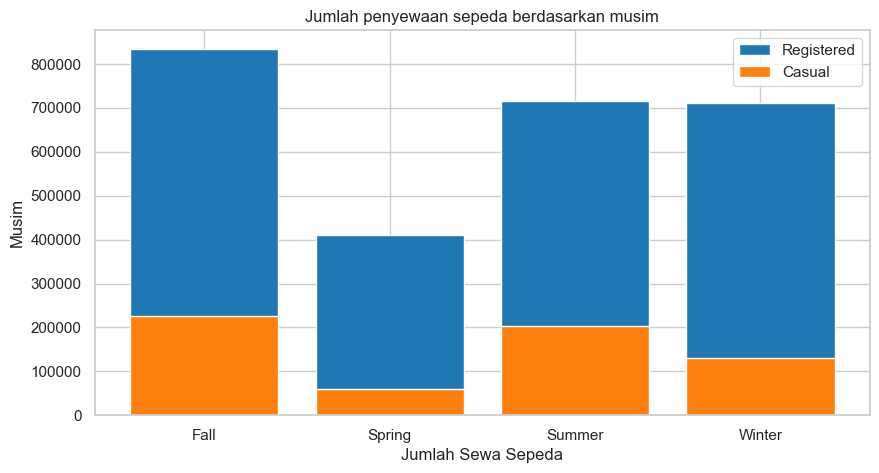

In [37]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 5))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel('Jumlah Sewa Sepeda')
plt.ylabel('Musim')
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()

Berdasarkan hasil Analisi diatas menggunakan barplot, dapat disimpulkan bahwa semua musim yang dinikmati bagi par apengguna sepeda adalah fall, lalu diikuti Summer, dan winter dan terakhir Spring.

## Conclusion

- **Conclusion Pertanyaan 1:**<br>
Dapat terlihat dengan jelas bahwa terdapat hubungan yang signifikan antara kondisi cuaca dan preferensi penyewa sepeda. Para penyewa sepeda cenderung sangat menyukai cuaca yang cerah atau sedikit mendung, terutama ketika Q3 (kuartil ketiga) di atas 6000, Q1 (kuartil pertama) kurang dari 4000, dan median hampir mencapai 5000. Kedua dalam preferensi adalah kondisi cuaca berkabut atau mendung, dengan Q3 di atas 5000, Q1 di bawah 3000, dan median di atas 4000. Sebaliknya, pengguna kurang menyukai kondisi cuaca sedikit bersalju atau hujan, dengan Q3 di atas 2000, Q1 di bawah 1000, dan median di atas 1000. Tidak ada data untuk kondisi cuaca saat badai besar, karena tidak memungkinkan untuk bersepeda dalam kondisi tersebut.

- **Conclusion Pertanyaan 2:**<br>
Dari visualisasi, terlihat bahwa jumlah pengguna sepeda lebih tinggi pada hari kerja (workingday) dibandingkan dengan hari libur (non-workingday), meskipun perbedaannya tidak begitu signifikan. Namun, ketika mengamati hari libur, terlihat bahwa non-holiday memiliki jumlah pengguna yang lebih tinggi dibandingkan dengan hari libur (holiday), perbedaan ini cukup mencolok. Kemungkinan besar, pengguna lebih cenderung menyewa sepeda pada hari biasa. Selain itu, berdasarkan hari dalam seminggu (weekday), Jumat (Fri) menonjol sebagai hari dengan jumlah pengguna tertinggi (mean 4690.288462), sedangkan Minggu (Sun) memiliki jumlah pengguna terendah (4228.828571).

- **Conclusion Pertanyaan 3:**<br>
Dari visualisasi tahun 2011 dan 2012, terlihat perbedaan puncak dan dasar bulan antara kedua tahun tersebut. Puncak penyewaan sepeda pada tahun 2011 terjadi pada bulan Juni, sementara dasarnya terjadi pada bulan Januari. Sementara itu, tahun 2012 mencatat puncak pada bulan September dan dasarnya pada bulan Januari. Secara keseluruhan, terlihat bahwa jumlah total sepeda yang disewakan pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

- **Conclusion Pertanyaan 4:**<br>
Dari ketiga visualisasi, dapat disimpulkan bahwa temperatur (temp dan atemp) memiliki korelasi positif yang signifikan dengan jumlah penyewaan sepeda. Artinya, ketika temperatur meningkat, jumlah pengguna sepeda juga cenderung meningkat. Sebaliknya, kelembaban udara (humidity) memiliki korelasi negatif yang minimal dengan jumlah pengguna sepeda, meskipun tidak terlalu signifikan. Hal ini menunjukkan bahwa peningkatan kelembaban dapat sedikit mempengaruhi penurunan jumlah penyewaan sepeda.

- **Conclusion Pertanyaan 5:**<br>
Pada visualisasi terakhir, hasilnya cukup mengejutkan, di mana musim semi (Spring) tidak menjadi yang terakhir dalam preferensi penyewa sepeda, melainkan musim gugur (Fall). Hal ini dapat disebabkan oleh berbagai faktor, termasuk kondisi cuaca, temperatur, hari kerja, hari libur, dan lain-lain. Sebaliknya, musim gugur (Fall) menonjol sebagai musim dengan jumlah penyewaan sepeda tertinggi, mencapai lebih dari 800,000.